# MACHING LEARNING - PULSAR 

## ● Analisis de Datos

### Librerias

In [136]:
import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

pd.set_option('display.max_columns', 50)

### Nombre de las caracteristicas

In [2]:
featuresNames = ['MeanIntegratedProfile',
                'StdIntegratedProfile',
                'ExcessKurtosisIntegratedProfile',
                'SkewnessIntegratedProfile',
                'MeanDMSNRCurve',
                'StdDMSNRCurve',
                'ExcessKurtosisDMSNRCurve',
                'SkewnessDMSNRCurve',
                'Class']

## [PulsarDataset](https://archive.ics.uci.edu/ml/datasets/HTRU2)

In [8]:
pulsar_data = pd.read_csv('HTRU_2.csv',header = None,names = featuresNames)

In [9]:
pulsar_data.shape

(17898, 9)

In [10]:
pulsar_data.head()

,MeanIntegratedProfile,StdIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,MeanDMSNRCurve,StdDMSNRCurve,ExcessKurtosisDMSNRCurve,SkewnessDMSNRCurve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [12]:
#Verificamos si existen datos faltantes
pulsar_data.count()

MeanIntegratedProfile              17898
StdIntegratedProfile               17898
ExcessKurtosisIntegratedProfile    17898
SkewnessIntegratedProfile          17898
MeanDMSNRCurve                     17898
StdDMSNRCurve                      17898
ExcessKurtosisDMSNRCurve           17898
SkewnessDMSNRCurve                 17898
Class                              17898
dtype: int64

In [15]:
pulsar_data.nunique()

MeanIntegratedProfile               8626
StdIntegratedProfile               17862
ExcessKurtosisIntegratedProfile    17897
SkewnessIntegratedProfile          17898
MeanDMSNRCurve                      9000
StdDMSNRCurve                      17894
ExcessKurtosisDMSNRCurve           17895
SkewnessDMSNRCurve                 17895
Class                                  2
dtype: int64

In [18]:
# % de registros únicos por variable
pulsar_data.nunique() / len(pulsar_data)

MeanIntegratedProfile              0.481953
StdIntegratedProfile               0.997989
ExcessKurtosisIntegratedProfile    0.999944
SkewnessIntegratedProfile          1.000000
MeanDMSNRCurve                     0.502849
StdDMSNRCurve                      0.999777
ExcessKurtosisDMSNRCurve           0.999832
SkewnessDMSNRCurve                 0.999832
Class                              0.000112
dtype: float64

In [19]:
# % de datos faltantes
pulsar_data.isna().sum() / len(pulsar_data)

MeanIntegratedProfile              0.0
StdIntegratedProfile               0.0
ExcessKurtosisIntegratedProfile    0.0
SkewnessIntegratedProfile          0.0
MeanDMSNRCurve                     0.0
StdDMSNRCurve                      0.0
ExcessKurtosisDMSNRCurve           0.0
SkewnessDMSNRCurve                 0.0
Class                              0.0
dtype: float64

#### Observamos como se mueven los datos segun los atributos, mostrando graficos.

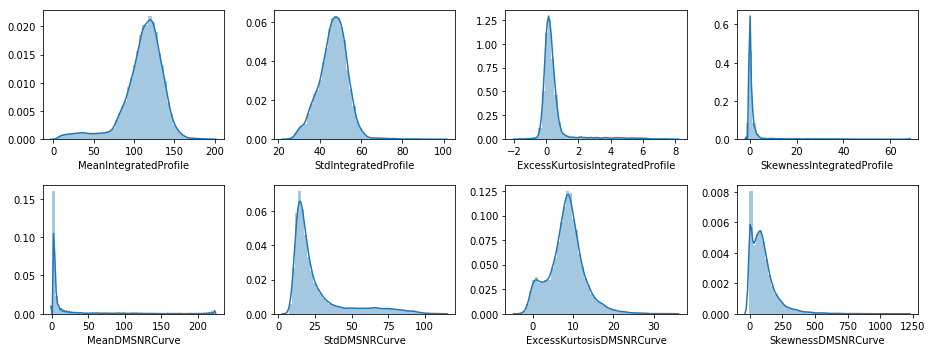

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(13,5))
for c,ax in zip(pulsar_data, axes.flatten()):
    sns.distplot(pulsar_data[c], ax=ax)
    
plt.tight_layout()

#### Normalizamos la data.

In [50]:
x = pulsar_data.drop('Class', axis = 1, inplace = False)
y = pulsar_data['Class']

In [56]:
normalized_x = scale(x)
normalized_x

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

#### Separamos la data en data de Entrenamiendo y Validación.

In [95]:
x_train, x_test, y_train, y_test = train_test_split(normalized_x,
                                                    y,
                                                    test_size = 0.1,
                                                    random_state = 42,
                                                    stratify = y)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_test.shape}')

Train shape     : (16108, 8)
Validation shape: (1790, 8)


## ● FOREST CLASSIFIER

#### Aplicando GridSearchCV para escoger el mejor criterio y profundidad  .

In [148]:
grid_param = {  
    'criterion': ['gini','entropy'],
    'max_depth': [4,5,6,7,8,9,10]
}

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                           param_grid = grid_param,
                           scoring = 'f1',
                           cv = 5)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [149]:

print('# Tuning hyper-parameters for f1')
print()

print('Best parameters set found on development set:')
print()
print(grid_search.best_params_)
print()
print('Grid scores on development set:')
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print('%0.4f (+/-%0.04f) for %r'
          % (mean, std * 2, params))

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 4}

Grid scores on development set:

0.8842 (+/-0.0219) for {'criterion': 'gini', 'max_depth': 4}
0.8815 (+/-0.0237) for {'criterion': 'gini', 'max_depth': 5}
0.8785 (+/-0.0216) for {'criterion': 'gini', 'max_depth': 6}
0.8788 (+/-0.0173) for {'criterion': 'gini', 'max_depth': 7}
0.8753 (+/-0.0125) for {'criterion': 'gini', 'max_depth': 8}
0.8711 (+/-0.0174) for {'criterion': 'gini', 'max_depth': 9}
0.8720 (+/-0.0122) for {'criterion': 'gini', 'max_depth': 10}
0.8798 (+/-0.0300) for {'criterion': 'entropy', 'max_depth': 4}
0.8762 (+/-0.0163) for {'criterion': 'entropy', 'max_depth': 5}
0.8763 (+/-0.0282) for {'criterion': 'entropy', 'max_depth': 6}
0.8748 (+/-0.0202) for {'criterion': 'entropy', 'max_depth': 7}
0.8713 (+/-0.0165) for {'criterion': 'entropy', 'max_depth': 8}
0.8708 (+/-0.0210) for {'criterion': 'entropy', 'max_depth': 9}
0.8649 (+/-0.0206) for {'criterion'

#### Entrenando el arbol de decision  .

In [150]:
# Entrenamos un arbol con poca segun la profundidad encontrada:
from sklearn.tree import DecisionTreeClassifier
f = DecisionTreeClassifier(criterion='gini',max_depth=4)
f.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [151]:
# Observamos que se tiene casi el mismo score.. descartando si existe Overfitting
print(f'Train     : {f.score(x_train, y_train)}')
print(f'Validation: {f.score(x_test, y_test)}')

Train     : 0.9810653091631487
Validation: 0.9770949720670391


In [152]:
# veamos el mse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, f.predict(x_train)), mean_squared_error(y_test, f.predict(x_test))

(0.018934690836851256, 0.022905027932960894)

#### Evaluacion del Modelo.

In [117]:
from sklearn import metrics

predicciones_test = f.predict(x_test)
num_predicciones_correctas = (y_test == predicciones_test).sum()
num_total_de_muestras = len(y_test)
exactitud = num_predicciones_correctas / num_total_de_muestras

print ( 'Predicciones correctas : ', num_predicciones_correctas )
print ( 'Número de muestras     : ', num_total_de_muestras )
print ( 'Exactitud (manual)     : ', exactitud )

# Usando scikit-learn
print ( 'Exactitud (score)      : ', f.score(x_test, y_test) )
print ( 'Exactitud (metrics)    : ', metrics.accuracy_score(y_test, predicciones_test) )

Predicciones correctas :  1750
Número de muestras     :  1790
Exactitud (manual)     :  0.9776536312849162
Exactitud (score)      :  0.9776536312849162
Exactitud (metrics)    :  0.9776536312849162


#### Matriz de Confusion.

In [118]:
matriz_confusion = metrics.confusion_matrix(y_test, predicciones_test)

# Mapeo según http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
TN = matriz_confusion[0,0]
FN = matriz_confusion[1,0]
FP = matriz_confusion[0,1]
TP = matriz_confusion[1,1]

print ('              +-----------------+')
print ('              |   Predicción    |')
print ('              +-----------------+')
print ('              |    +   |    -   |')
print ('+-------+-----+--------+--------+')
print ('| Valor |  +  |   %d |   %d   |'   % (TP, FN) )
print ('| real  +-----+--------+--------+')
print ('|       |  -  |   %d  |   %d  |'    % (FP, TN) )
print ('+-------+-----+--------+--------+')
print ()
print ( 'Exactitud    : ', (TP+TN)/(TP+FN+FP+TN) )

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   135 |   29   |
| real  +-----+--------+--------+
|       |  -  |   11  |   1615  |
+-------+-----+--------+--------+

Exactitud    :  0.9776536312849162


#### Curva ROC.

In [132]:
probabilidades_test = f.predict_proba(x_test)
print ('Probabilidad de la clase negativa y de la clase positiva :')
print (probabilidades_test)

Probabilidad de la clase negativa y de la clase positiva :
[[0.9824265 0.0175735]
 [0.9824265 0.0175735]
 [0.9824265 0.0175735]
 ...
 [0.9824265 0.0175735]
 [0.9824265 0.0175735]
 [0.9824265 0.0175735]]


In [133]:
# Predecimos +1 siempre que la probabilidad de la clase positiva sea mayor a 0.5
predicciones_test = np.where(probabilidades_test[:,1] > 0.5, +1, -1) 
print ( 'Exactitud : ', metrics.accuracy_score(y_test, predicciones_test) )

Exactitud :  0.07541899441340782


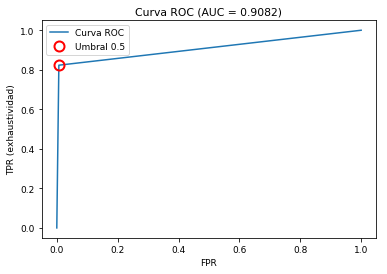

In [134]:
fpr, tpr, umbrales = metrics.roc_curve(y_test, probabilidades_test[:,1])
auc_roc = metrics.roc_auc_score(y_test, probabilidades_test[:,1])

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC (AUC = %.4f)" % auc_roc))
# ubicamos el punto más cercano a 0.5
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)

## ● RANDOM FOREST CLASSIFIER

In [157]:
from sklearn.ensemble import RandomForestRegressor

#### Aplicando GridSearchCV para escoger el mejor criterio y profundidad  .

In [166]:
grid_param_ran = {  
    'n_estimators': [10, 20,30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5]
}

grid_random = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = grid_param_ran,
                           cv = 5)

grid_random.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [167]:

print('# Tuning hyper-parameters for f1')
print()

print('Best parameters set found on development set:')
print()
print(grid_random.best_params_)
print()
print('Grid scores on development set:')
print()
means = grid_random.cv_results_['mean_test_score']
stds = grid_random.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_random.cv_results_['params']):
    print('%0.4f (+/-%0.04f) for %r'
          % (mean, std * 2, params))

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 30}

Grid scores on development set:

0.7962 (+/-0.0347) for {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 10}
0.7997 (+/-0.0357) for {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 20}
0.8000 (+/-0.0357) for {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 30}
0.8008 (+/-0.0352) for {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 40}
0.7769 (+/-0.0462) for {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}
0.7823 (+/-0.0377) for {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 20}
0.7798 (+/-0.0356) for {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 30}
0.7800 (+/-0.0381) for {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 40}
0.7875 (+/-0.0341) for {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 10}
0.7872 (+/-0.0377) for {'max_depth': 4, 'max_features': 'log2', 'n_e

#### Entrenando el arbol de decision  .

In [172]:

m = RandomForestRegressor(n_estimators  = 10)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [173]:
# Observamos que se tiene variacion en el score
print(f'Train     : {m.score(x_train, y_train)}')
print(f'Validation: {m.score(x_test, y_test)}')

Train     : 0.9612891706347506
Validation: 0.7615696156961569


In [170]:
# veamos el mse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, m.predict(x_train)), mean_squared_error(y_test,m.predict(x_test))

(0.002602295615705101, 0.01938671632526381)

In [171]:
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')
    if hasattr(m, 'oob_score_'): print(f'OOB        = {m.oob_score_:.4}')
    
score() 

Scores:
Train      = 0.9687
Validation = 0.7671


In [112]:
m.feature_importances_

array([0.03196006, 0.03146984, 0.80342038, 0.02543329, 0.02147481,
       0.04580825, 0.02107416, 0.0193592 ])